Clustering and silhouette analysis for 3 (retained earning, revenue, EPS) and 4 (also incluing net assests) accouting constructs is performed. These constructs were chosen based on their correlation with share price, and their ability to incorporate the behavior of major accounting metrics.

Importing the libraries:

In [10]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("CA.csv")

In [6]:
df1 = df.fillna(df.mean())

,GVKEY,ainetassets,aiV1DINTANQ,aiV1BREVTY,aiV1BREQ,aiV1BOANCFY,aiV1BPPENTQ,aiV1BCEQQ,aiEPSPIQ,aiDVPSXQ,aiOPEPSQ
0,1004,0.660123,-0.253347,-0.005169,0.708768,-0.272404,-0.144950,0.662593,-0.215897,0.248870,0.048348
1,1045,0.436160,-0.332158,-0.059003,0.403617,0.259336,-0.110684,0.436160,0.219562,0.366245,0.301159
2,1050,0.550223,0.423066,0.019886,0.569111,0.328532,0.171367,0.559882,-0.014337,0.558584,0.372259
3,1062,0.656148,0.244856,0.153589,0.657637,0.166336,0.268616,0.656148,-0.054911,0.143853,-0.054648
4,1072,0.478483,0.385072,0.074197,0.457477,0.201867,0.481459,0.478483,0.251359,0.261894,0.417903
...,...,...,...,...,...,...,...,...,...,...,...
3360,293754,0.808560,0.244856,0.197797,-0.136941,-0.725713,0.553972,0.808560,-0.261311,0.415771,-0.261311
3361,293884,0.882212,0.919038,0.363396,0.912632,0.382444,0.970384,0.879332,0.054913,0.415771,0.371568
3362,294524,-0.094781,-0.319382,-0.017018,0.750294,0.469906,0.746387,-0.090000,0.799422,0.114388,0.822381
3363,296885,0.458972,0.347823,0.202642,0.611790,0.457790,0.285128,0.458972,0.290919,0.415771,0.277763


In [8]:
df10 = df1.drop(columns=['GVKEY'])

In [9]:
df10

,ainetassets,aiV1DINTANQ,aiV1BREVTY,aiV1BREQ,aiV1BOANCFY,aiV1BPPENTQ,aiV1BCEQQ,aiEPSPIQ,aiDVPSXQ,aiOPEPSQ
0,0.660123,-0.253347,-0.005169,0.708768,-0.272404,-0.144950,0.662593,-0.215897,0.248870,0.048348
1,0.436160,-0.332158,-0.059003,0.403617,0.259336,-0.110684,0.436160,0.219562,0.366245,0.301159
2,0.550223,0.423066,0.019886,0.569111,0.328532,0.171367,0.559882,-0.014337,0.558584,0.372259
3,0.656148,0.244856,0.153589,0.657637,0.166336,0.268616,0.656148,-0.054911,0.143853,-0.054648
4,0.478483,0.385072,0.074197,0.457477,0.201867,0.481459,0.478483,0.251359,0.261894,0.417903
...,...,...,...,...,...,...,...,...,...,...
3360,0.808560,0.244856,0.197797,-0.136941,-0.725713,0.553972,0.808560,-0.261311,0.415771,-0.261311
3361,0.882212,0.919038,0.363396,0.912632,0.382444,0.970384,0.879332,0.054913,0.415771,0.371568
3362,-0.094781,-0.319382,-0.017018,0.750294,0.469906,0.746387,-0.090000,0.799422,0.114388,0.822381
3363,0.458972,0.347823,0.202642,0.611790,0.457790,0.285128,0.458972,0.290919,0.415771,0.277763


-

-

#### Here, clustering is done for all ten important features (dataframe df10). The value of "K" in K-means is varied from 2  to 10 in order to find better clusters. With K=2, Silhouette Coefficient's (SC) value is 0.25, which represents that the clusters are not good. 

In [10]:
# for all ten Accounting contructs

for i in range(2,11):
    model = KMeans(n_clusters=i).fit(df10)
    s_coeff = silhouette_score(df10, model.labels_)
    print("For " + str(i) + " clusters, the coefficient is " + str(s_coeff))

For 2 clusters, the coefficient is 0.2521302566451049
For 3 clusters, the coefficient is 0.1797573548244438
For 4 clusters, the coefficient is 0.18121683339876285
For 5 clusters, the coefficient is 0.16249808876873195
For 6 clusters, the coefficient is 0.14819123588185243
For 7 clusters, the coefficient is 0.1465983032988875
For 8 clusters, the coefficient is 0.14914276010108213
For 9 clusters, the coefficient is 0.14955858747956152
For 10 clusters, the coefficient is 0.13980591888346083


In [15]:
df1

,GVKEY,ainetassets,aiV1DINTANQ,aiV1BREVTY,aiV1BREQ,aiV1BOANCFY,aiV1BPPENTQ,aiV1BCEQQ,aiEPSPIQ,aiDVPSXQ,aiOPEPSQ
0,1004,0.660123,-0.253347,-0.005169,0.708768,-0.272404,-0.144950,0.662593,-0.215897,0.248870,0.048348
1,1045,0.436160,-0.332158,-0.059003,0.403617,0.259336,-0.110684,0.436160,0.219562,0.366245,0.301159
2,1050,0.550223,0.423066,0.019886,0.569111,0.328532,0.171367,0.559882,-0.014337,0.558584,0.372259
3,1062,0.656148,0.244856,0.153589,0.657637,0.166336,0.268616,0.656148,-0.054911,0.143853,-0.054648
4,1072,0.478483,0.385072,0.074197,0.457477,0.201867,0.481459,0.478483,0.251359,0.261894,0.417903
...,...,...,...,...,...,...,...,...,...,...,...
3360,293754,0.808560,0.244856,0.197797,-0.136941,-0.725713,0.553972,0.808560,-0.261311,0.415771,-0.261311
3361,293884,0.882212,0.919038,0.363396,0.912632,0.382444,0.970384,0.879332,0.054913,0.415771,0.371568
3362,294524,-0.094781,-0.319382,-0.017018,0.750294,0.469906,0.746387,-0.090000,0.799422,0.114388,0.822381
3363,296885,0.458972,0.347823,0.202642,0.611790,0.457790,0.285128,0.458972,0.290919,0.415771,0.277763


In [16]:
#  for 3 and 4 accounting constructs
#  4 elements [Retained earnings, Revenue, EPs, net assets]
#  3 elements [Retained earnings, Revenue, EPS]
#  Retained earnings = aiV1BREQ, Revenue = aiV1BREVTY, EPS = aiEPSP1Q, net assets = ainetassets


df4 = df1.drop(columns=['GVKEY','aiV1DINTANQ','aiV1BOANCFY','aiV1BPPENTQ','aiV1BOANCFY','aiV1BPPENTQ','aiV1BCEQQ','aiV1BCEQQ','aiOPEPSQ','aiDVPSXQ'])

In [17]:
df4

,ainetassets,aiV1BREVTY,aiV1BREQ,aiEPSPIQ
0,0.660123,-0.005169,0.708768,-0.215897
1,0.436160,-0.059003,0.403617,0.219562
2,0.550223,0.019886,0.569111,-0.014337
3,0.656148,0.153589,0.657637,-0.054911
4,0.478483,0.074197,0.457477,0.251359
...,...,...,...,...
3360,0.808560,0.197797,-0.136941,-0.261311
3361,0.882212,0.363396,0.912632,0.054913
3362,-0.094781,-0.017018,0.750294,0.799422
3363,0.458972,0.202642,0.611790,0.290919


#### Here, clustering is done for 4 important features (dataframe df4). The value of "K" in K-means is varied from 2  to 10 in order to find better clusters. With K=2, Silhouette Coefficient's (SC) value is 0.39, which represents that the clusters are better in this case. 

In [18]:
for i in range(2,11):
    model = KMeans(n_clusters=i).fit(df4)
    s_coeff = silhouette_score(df4, model.labels_)
    print("For " + str(i) + " clusters, the coefficient is " + str(s_coeff))

For 2 clusters, the coefficient is 0.39105907934269774
For 3 clusters, the coefficient is 0.27442362611263116
For 4 clusters, the coefficient is 0.29268678297895795
For 5 clusters, the coefficient is 0.24943403921937712
For 6 clusters, the coefficient is 0.25936687547689846
For 7 clusters, the coefficient is 0.252987925109901
For 8 clusters, the coefficient is 0.2532427286067996
For 9 clusters, the coefficient is 0.23658657876788097
For 10 clusters, the coefficient is 0.24118240411515218


In [19]:
df3 = df1.drop(columns=['ainetassets','GVKEY','aiV1DINTANQ','aiV1BOANCFY','aiV1BPPENTQ','aiV1BOANCFY','aiV1BPPENTQ','aiV1BCEQQ','aiV1BCEQQ','aiOPEPSQ','aiDVPSXQ'])
df3

,aiV1BREVTY,aiV1BREQ,aiEPSPIQ
0,-0.005169,0.708768,-0.215897
1,-0.059003,0.403617,0.219562
2,0.019886,0.569111,-0.014337
3,0.153589,0.657637,-0.054911
4,0.074197,0.457477,0.251359
...,...,...,...
3360,0.197797,-0.136941,-0.261311
3361,0.363396,0.912632,0.054913
3362,-0.017018,0.750294,0.799422
3363,0.202642,0.611790,0.290919


#### Here, clustering is done for 3 important features (dataframe df3). The value of "K" in K-means is varied from 2  to 10 in order to find better clusters. With K=2, Silhouette Coefficient's (SC) value is 0.44, which represents that the clusters are good in this case. 



We tried a lot of different combinations, but this seems to be the best.

In [20]:

for i in range(2,11):
    model = KMeans(n_clusters=i).fit(df3)
    s_coeff = silhouette_score(df3, model.labels_)
    print("For " + str(i) + " clusters, the coefficient is " + str(s_coeff))

For 2 clusters, the coefficient is 0.44067835389656507
For 3 clusters, the coefficient is 0.2949089812326476
For 4 clusters, the coefficient is 0.2848434662306061
For 5 clusters, the coefficient is 0.2893897315600649
For 6 clusters, the coefficient is 0.27921414391102206
For 7 clusters, the coefficient is 0.27584116853226365
For 8 clusters, the coefficient is 0.27193789288768644
For 9 clusters, the coefficient is 0.2730734041020218
For 10 clusters, the coefficient is 0.2530306393288403


In [21]:
model = KMeans(n_clusters=2).fit(df3)
df3['Labels'] = model.labels_
gvnp = df1['GVKEY'].to_numpy()
df3['GVKEY'] = gvnp

In [22]:
df3.to_csv("Clustering_3_elements.csv")

#### This is a 3 dimensional clustering plot of a dataset with 3 dimension.

-

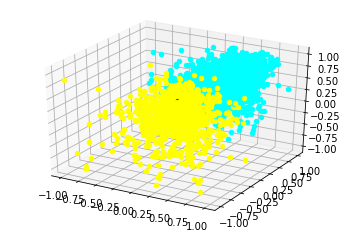

In [31]:
colors = ['yellow', 'cyan', 'red', 'blue', 'green']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

df3_np=df3.to_numpy()

for dot, label in zip(df3_np, model.labels_):
    ax.scatter(dot[0],dot[1], dot[2],c=colors[label])
for center in model.cluster_centers_:
    ax.scatter(center[0], center[1], dot[2],c="black", marker="^")
plt.show()

Based on the above clustering results, further analysis was done to understand why these firms were clustered together. We concluded that earnings is a crucial metric associated with the share price of a firm. 

Initially, we show that a wide variety of accounting metrics best correlates with a firm's share prices. This means that earnings is not always the best one. 

We use silhouette coefficient analysis to segregate the firms in our dataset and capture different share-price relationships. We identify three key metrics during this process: revenue per share, earnings per share and retained earnings per share. Above analysis shows that firms fall nicely into two clusters using these three metrics. 

While justifying the occurance of a firm in above clusters, we observe using several techniques that firms with higher correlation of share price-to-earnings and retained earnings are generally more mature with more persistant operations. They are more likely to be in Finance industry.

Retail sector firms generally have their share price more strongly correlated with their revenue.